<a href="https://colab.research.google.com/github/TsabitaNurul/Machine_Learning/blob/main/Artificial%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ulfa Zakiatul Mardhiah (201810370311058) </br>
Tsabita Nurul Izzah (201810370311082)**

Load Data

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 97% 657M/675M [00:07<00:00, 93.1MB/s]
100% 675M/675M [00:07<00:00, 88.7MB/s]


In [ ]:
api_token = {"username":"tsabita","key":"58e5a6714bc142e9a4c7a1c883dc8f18"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import os
import zipfile

local_zip = '/content/cell-images-for-detecting-malaria.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
import os
base_dataset = "cell_images"
class_dir = ['Parasitized','Uninfected']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [ ]:
from os import mkdir

mkdir('/content/model_cell_images')
mkdir('/content/model_cell_images/train')
mkdir('/content/model_cell_images/train/Parasitized')
mkdir('/content/model_cell_images/train/Uninfected')
mkdir('/content/model_cell_images/validation')
mkdir('/content/model_cell_images/validation/Parasitized')
mkdir('/content/model_cell_images/validation/Uninfected')

In [ ]:
# Hasil pengerjaan point 1.2
import os
import shutil

Parasitized_original = "/content/cell_images/Parasitized"
Parasitized_train = "/content/model_cell_images/train/Parasitized"
Parasitized_validation = "/content/model_cell_images/validation/Parasitized"

files = os.listdir(Parasitized_original)

# memindahkan 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{Parasitized_original}/{file}", Parasitized_train)

In [ ]:
files2 = os.listdir(Parasitized_original)

# memmindahkan sisa(seluruh file)
for file in files2:
    new_path = shutil.move(f"{Parasitized_original}/{file}", Parasitized_validation)

In [ ]:
Uninfected_original = "/content/cell_images/Uninfected"
Uninfected_train = "/content/model_cell_images/train/Uninfected"
Uninfected_validation = "/content/model_cell_images/validation/Uninfected"

filesUn = os.listdir(Uninfected_original)

# memindahkan 70% file
for file in filesUn[0:int(len(filesUn) * .7)]:
    new_path = shutil.move(f"{Uninfected_original}/{file}", Uninfected_train)

In [ ]:
files2Un = os.listdir(Uninfected_original)

# memmindahkan sisa(seluruh file)
for file in files2Un:
    new_path = shutil.move(f"{Uninfected_original}/{file}", Uninfected_validation)

In [ ]:
# Hasil pengerjaan point 1.3
file_train_Para = os.listdir(Parasitized_train)
file_Val_Para = os.listdir(Parasitized_validation)
file_train_Un = os.listdir(Uninfected_train)
file_Val_Un = os.listdir(Uninfected_validation)

print(file_train_Para[0:int(len(file_train_Para) * .001)])
print("data Parasitized train : " + str(len(file_train_Para)))
print("data Parasitized validation : " + str(len(file_Val_Para)))
print("data Uninfected train : " + str(len(file_train_Un)))
print("data Uninfected validation : " + str(len(file_Val_Un)))

['C84P45ThinF_IMG_20150818_102325_cell_102.png', 'C99P60ThinF_IMG_20150918_141857_cell_11.png', 'C184P145ThinF_IMG_20151203_104153_cell_128.png', 'C132P93ThinF_IMG_20151004_152808_cell_36.png', 'C167P128ReThinF_IMG_20151201_105559_cell_226.png', 'C39P4thinF_original_IMG_20150622_105253_cell_96.png', 'C179P140ThinF_IMG_20151127_153350_cell_178.png', 'C132P93ThinF_IMG_20151004_152642_cell_16.png', 'C133P94ThinF_IMG_20151004_155331_cell_112.png']
data Parasitized train : 9645
data Parasitized validation : 4134
data Uninfected train : 9645
data Uninfected validation : 4134


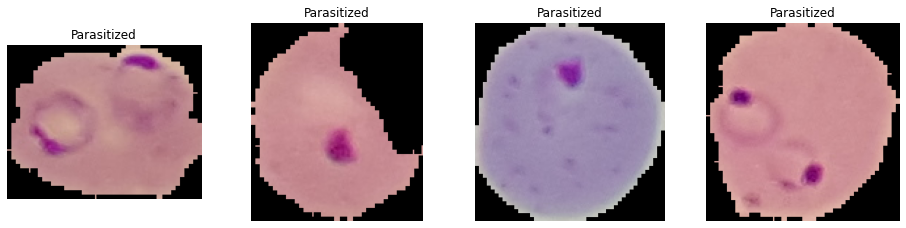

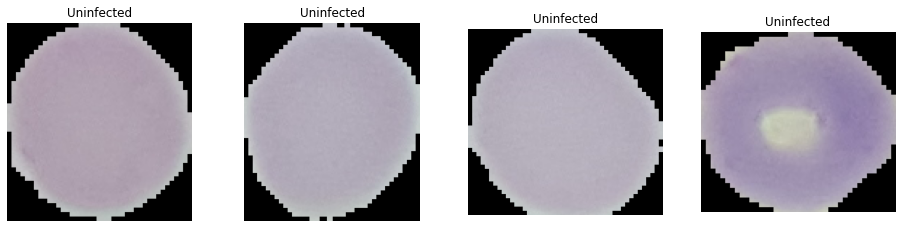

In [ ]:
# Hasil pengerjaan point 1.4
import matplotlib.pyplot as plt
import matplotlib.image as mping

Parasitized_dir=os.path.join('/content/model_cell_images/train/Parasitized')
Uninfected_dir=os.path.join('/content/model_cell_images/train/Uninfected')

Parasitized_image = os.listdir(Parasitized_dir)
Uninfected_image = os.listdir(Uninfected_dir)

fname1 = [os.path.join(Parasitized_dir,fname)
        for fname in Parasitized_image[:4]]

fname2 = [os.path.join(Uninfected_dir,fname)
        for fname in Uninfected_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Parasitized')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Uninfected')
    plt.imshow(img)
    
plt.show()

Preprocessing

In [ ]:
# Hasil pengerjaan point 2.1
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir=os.path.join('/content/model_cell_images/train')
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []

vali_dir=os.path.join('/content/model_cell_images/validation')
for r, d, f in os.walk(vali_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# Hasil pengerjaan point 2.2
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (19290, 100, 100, 3)
Train Label =  (19290,)
Validation Data =  (8268, 100, 100, 3)
Validation Label =  (8268,)


In [ ]:
# Hasil pengerjaan point 2.3
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])
x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [ ]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['Parasitized' 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized'
 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized' 'Parasitized']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


Modelling

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(100, 100, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 100x100x3 menjadi vektor
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(145, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               15360512  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 145)               18705     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 146   

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
965/965 [==============================] - 11s 11ms/step - loss: 0.6351 - acc: 0.6333 - val_loss: 0.6346 - val_acc: 0.6324
Epoch 2/100
965/965 [==============================] - 12s 12ms/step - loss: 0.6128 - acc: 0.6625 - val_loss: 0.6027 - val_acc: 0.6742
Epoch 3/100
965/965 [==============================] - 11s 11ms/step - loss: 0.6052 - acc: 0.6729 - val_loss: 0.5960 - val_acc: 0.6782
Epoch 4/100
965/965 [==============================] - 11s 11ms/step - loss: 0.5990 - acc: 0.6771 - val_loss: 0.5915 - val_acc: 0.6815
Epoch 5/100
965/965 [==============================] - 11s 11ms/step - loss: 0.5923 - acc: 0.6829 - val_loss: 0.5950 - val_acc: 0.6773
Epoch 6/100
965/965 [==============================] - 12s 12ms/step - loss: 0.5857 - acc: 0.6912 - val_loss: 0.5955 - val_acc: 0.6731
Epoch 7/100
965/965 [==============================] - 11s 11ms/step - loss: 0.5871 - acc: 0.6938 - val_loss: 0.6012 - val_acc: 0.6817
Epoch 8/100
965/965 [==============================] - 

Result

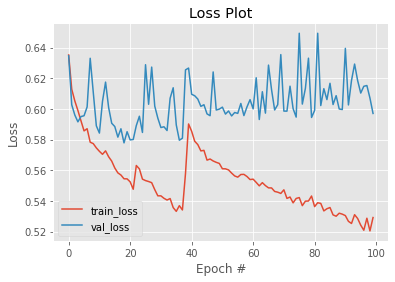

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

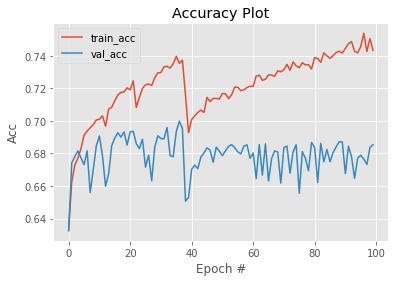

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      4134
           1       0.69      0.66      0.68      4134

    accuracy                           0.69      8268
   macro avg       0.69      0.69      0.69      8268
weighted avg       0.69      0.69      0.69      8268

